In [412]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler

In [413]:
df_games = pd.read_csv('games_c4.csv')
df_games = df_games.iloc[:, 1:]
df_games.head()

,QueryName,DeveloperCount,Unnamed: 11,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,Unnamed: 20,Unnamed: 21,Unnamed: 23,...,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,rating,TotalReviews,ReviewScore,CustomRating,Sales
0,Counter-Strike,1,NaN,68991,1,13033334,9140731,NaN,NaN,NaN,...,"{'Action': 5472, 'FPS': 4897, 'Multiplayer': 3...",96.0,149589.0,95.0,908.0,97.458003,236979.0,0.974580,-5.349292,1.302030e+08
1,Team Fortress Classic,1,NaN,2439,1,5399140,753627,NaN,NaN,NaN,...,"{'Action': 763, 'FPS': 327, 'Multiplayer': 277...",86.0,6045.0,89.0,64.0,86.873772,8144.0,0.868738,-3.779629,2.694171e+07
2,Day of Defeat,1,NaN,2319,1,7621102,1709740,NaN,NaN,NaN,...,"{'FPS': 798, 'World War II': 270, 'Multiplayer...",87.0,4038.0,97.0,36.0,90.150843,6762.0,0.901508,-3.731648,3.802930e+07
3,Deathmatch Classic,1,NaN,888,1,7498965,789676,NaN,NaN,NaN,...,"{'Action': 635, 'FPS': 150, 'Classic': 115, 'M...",81.0,2120.0,95.0,21.0,82.588076,2952.0,0.825881,-3.296144,3.741984e+07
4,Half-Life: Opposing Force,1,NaN,2934,1,5399499,705741,NaN,NaN,NaN,...,"{'FPS': 916, 'Action': 350, 'Classic': 281, 'S...",95.0,18994.0,95.0,269.0,95.188645,22052.0,0.951886,-4.295354,2.694350e+07


In [414]:
df_Player = pd.read_csv('../data/avg_play.csv')
df_games = pd.read_csv('games_c4.csv')
df_games = pd.merge(df_games ,df_Player ,how='left',on='AppID')
df_games

,AppID,QueryName,DeveloperCount,Unnamed: 11,RecommendationCount,PublisherCount,SteamSpyOwners,SteamSpyPlayersEstimate,Unnamed: 20,Unnamed: 21,...,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,rating,TotalReviews,ReviewScore,CustomRating,Sales,avg_playtime
0,10,Counter-Strike,1,NaN,68991,1,13033334,9140731,NaN,NaN,...,96.0,149589.0,95.0,908.0,97.458003,236979.0,0.974580,-5.349292,1.302030e+08,251.824891
1,20,Team Fortress Classic,1,NaN,2439,1,5399140,753627,NaN,NaN,...,86.0,6045.0,89.0,64.0,86.873772,8144.0,0.868738,-3.779629,2.694171e+07,21.889187
2,30,Day of Defeat,1,NaN,2319,1,7621102,1709740,NaN,NaN,...,87.0,4038.0,97.0,36.0,90.150843,6762.0,0.901508,-3.731648,3.802930e+07,29.972090
3,40,Deathmatch Classic,1,NaN,888,1,7498965,789676,NaN,NaN,...,81.0,2120.0,95.0,21.0,82.588076,2952.0,0.825881,-3.296144,3.741984e+07,15.260961
4,50,Half-Life: Opposing Force,1,NaN,2934,1,5399499,705741,NaN,NaN,...,95.0,18994.0,95.0,269.0,95.188645,22052.0,0.951886,-4.295354,2.694350e+07,5.748227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13298,567660,Baseball Riot,1,NaN,0,1,0,0,NaN,NaN,...,80.0,10.0,-1.0,-1.0,70.000000,30.0,0.700000,-1.191362,0.000000e+00,4.236905
13299,567860,Passage 4,1,NaN,0,1,0,0,NaN,NaN,...,93.0,16.0,-1.0,-1.0,95.454545,22.0,0.954545,-1.316273,0.000000e+00,NaN
13300,567940,Piximalism,1,NaN,0,1,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13301,568150,Technoball,1,NaN,0,1,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sid Meier's Civilization IV                      2
Sid Meier's Civilization IV: Warlords            2
Ultimate Arena                                   2
Spellbind                                        2
Taxi                                             2
New York Bus Simulator                           2
Streamline                                       2
Dark Matter                                      2
Snapshot                                         2
Monday Night Combat                              2
Darksiders                                       2
Call of Duty: Modern Warfare 3                   2
Total War: SHOGUN 2                              2
Alpha Protocol                                   2
Arma 2                                           2
Fallout: New Vegas                               2
Sid Meier's Civilization IV: Colonization        2
Sid Meier's Civilization V                       2
Sid Meier's Civilization IV: Beyond the Sword    2
Rise                                             2
Name: QueryName, dtype: int64

In [415]:
df_games = df_games.sort_values(
    ['SteamSpyOwners', 'RecommendationCount'], ascending=False).drop_duplicates(subset='QueryName', keep='first'
)

df_games = df_games[df_games['Sales'] > 0]

df_games.to_csv("games_c5.csv", index=False)

df_games= df_games.drop(columns=[
    'Unnamed: 11', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 23', 'Unnamed: 25',
    'AppID', 'QueryName',
    'Developers', 'developers',  # Developer related columns
    'publishers',  # Publisher related columns
    'PriceCurrency',  # Price related
    'Recommendations',  # Reviews and ratings
    'DLC count',  # Redundant DLC count
    'Categories',  # Redundant category
    'Single-player',  # Redundant category
    'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',  # Specific genres
    'PlatformWindows', 'ShortDescrip', 'DetailedDescrip',
    'PCMinReqsText', 'Release date', 'Windows', 'Genres', 'Day',
    # 'Cross-Platform', 'Multiplayer',
    'Online PvP', 'PvP', 'VR Supported', 'about_the_game', 'packages', 'categories',
    'genres', 'tags', 'pct_pos_total', 'pct_pos_recent', 'num_reviews_recent', 'CustomRating',
    'Metacritic score',
    'num_reviews_total',
    'SteamSpyPlayersEstimate'
])


# Data Cleaning

## Zero replacement

In [416]:
zero_columns = ['Achievements', 'Price', 'dlc_count', 'VR Support'] + list(df_games.iloc[:, 10:31].columns)

df_games[zero_columns] = df_games[zero_columns].fillna(0)

## Not found

In [417]:
df_games['Publishers'] = df_games['Publishers'].fillna('Not Found')

## Most Frequent

In [418]:
import numpy as np
from datetime import datetime

# Assuming df_games is the dataset, current year for calculating year difference
current_year = datetime.now().year

# Fill 'Year' with the most frequent year and calculate (current_year - Year)
most_frequent_year = df_games['Year'].mode()[0]
df_games['Year'] = df_games['Year'].fillna(most_frequent_year)
df_games['YearDifference'] = current_year - df_games['Year']

# Fill 'Month' with the most frequent month and create sin and cos transformations
most_frequent_month = df_games['Month'].mode()[0]
df_games['Month'] = df_games['Month'].fillna(most_frequent_month)

# Creating sin and cos transformations for cyclical month representation
df_games['Month_sin'] = np.sin(2 * np.pi * df_games['Month'] / 12)
df_games['Month_cos'] = np.cos(2 * np.pi * df_games['Month'] / 12)

df_games.drop(columns=['Year', 'Month'], inplace=True)


## Average

In [419]:
imp_mean = SimpleImputer(strategy='mean')
mean_feats = ['age_ranking', 'rating', 'ReviewScore', 'avg_playtime']

df_games[mean_feats] = imp_mean.fit_transform(df_games[mean_feats])

## Median

In [420]:
imp_median = SimpleImputer(strategy='median')

median_feats = ['TotalReviews', 'positive', 'negative']

df_games[median_feats] = imp_median.fit_transform(df_games[median_feats])

## Balance (positive x negative)

In [421]:
df_games['balance_pos_neg'] = df_games['positive'] - df_games['negative']

df_games.drop(columns=['positive', 'negative'], inplace=True)

# Preprocessing

Replace the null values

Achievements -> equal to 0 - ok

Year -> most frequent and (This year - year) - ok

Month -> most frequent and sin and cos - ok

Columns 10:31 -> replace with zero - ok

age_ranking: most frequent and OHE - ok

Price -> equal to 0 and scaler - ok

dlc_count -> equal to 0 and scaler - ok

positive and negative -> balance between then and scaler

rating -> average and scaler

TotalReviews -> median and scaler

ReviewScore -> average and scaler

## One Hot Encoder

In [422]:
enc_bool = OneHotEncoder(handle_unknown='ignore', drop='if_binary')

enc_bool.fit(df_games[['PurchaseAvail', 'CategorySinglePlayer']])

encoded_df = pd.DataFrame(enc_bool.transform(
    df_games[['PurchaseAvail', 'CategorySinglePlayer']]).toarray(),
    columns=enc_bool.get_feature_names_out(['PurchaseAvail', 'CategorySinglePlayer'])
)

encoded_df.index = df_games.index

df_games = df_games.drop(['PurchaseAvail', 'CategorySinglePlayer'], axis=1)
df_games = pd.concat([df_games, encoded_df], axis=1)
df_games.rename(columns={'PurchaseAvail_True':'PurchaseAvail', 'CategorySinglePlayer_True':'CategorySinglePlayer'},
                inplace=True)

In [423]:
dd = pd.read_csv('../data/dd.csv')


add budget category

In [424]:
# Function to calculate points based on game features
def calculate_points(row):
    points = 0
    AAA_List_P = dd['Publishers'][0:47].to_list()
    AA_List_P = dd['Publishers'][47:300].to_list()
    indie_List_P = dd['Publishers'][300:].to_list()

    # ckeck if the game's publisher is in the lists
    if row['Publishers']  in AAA_List_P:
        points += 15
    elif row['Publishers'] in AA_List_P:
        points += 9
    else:
        points += 1
    # Price points
    if row['Price'] >= 30.00:
        points += 5
    elif 20 <= row['Price'] < 30.00:
        points += 3
    else:
        points += 1
    # TotalReviews points
    if row['TotalReviews'] > 30000:
        points += 5
    elif 5000 <= row['TotalReviews'] <= 30000:
        points += 3
    else:
        points += 1
    # DeveloperCount points
    if row['DeveloperCount'] >= 2:
        points += 3
    elif row['DeveloperCount'] == 1:
        points += 2
    else:
        points += 1
    # Achievements points
    if row['Achievements'] > 20:
        points += 3
    else:
        points += 1
    # avg_playtime points
    if row['avg_playtime'] > 1000:
        points += 3
    elif 100 <= row['avg_playtime'] <= 1000:
        points += 2
    else:
        points += 1
    return points
# Apply the function to calculate points for each game
df_games['TotalPoints'] = df_games.apply(calculate_points, axis=1)
# Define thresholds for BudgetCategory based on points
def categorize_by_points(row):
    if row['TotalPoints'] >= 19:
        return 'AAA'
    elif 12 <= row['TotalPoints'] < 19:
        return 'AA'
    else:
        return 'Indie'
# Apply the categorization
df_games['BudgetCategory'] = df_games.apply(categorize_by_points, axis=1)

# delete Publishers
df_games.drop(columns='Publishers', inplace=True)

In [425]:
# One-hot encoding the 'BudgetCategory' column
df_games = pd.get_dummies(df_games, columns=['BudgetCategory'], prefix='Budget')

# This will create three new columns: 'Budget_Indie', 'Budget_AA', and 'Budget_AAA',
# with binary values indicating the presence of each category


In [426]:
df_games.to_csv('GamesFinish_woScaling.csv', index=False)

In [427]:
df_games.head()

,DeveloperCount,RecommendationCount,PublisherCount,SteamSpyOwners,Achievements,Adventure,Casual,Indie,RPG,Free To Play,...,YearDifference,Month_sin,Month_cos,balance_pos_neg,PurchaseAvail,CategorySinglePlayer,TotalPoints,Budget_AA,Budget_AAA,Budget_Indie
21,1,140726,1,15574539,101.0,0.0,0.0,0.0,0.0,0.0,...,15.0,-0.5,0.866025,812793.0,1.0,1.0,28,0,1,0
10,1,53931,1,15433570,147.0,0.0,0.0,0.0,0.0,0.0,...,20.0,-0.5,0.866025,157463.0,1.0,0.0,28,0,1,0
13,1,4328,1,14001822,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,-0.5,0.866025,10436.0,1.0,0.0,23,0,1,0
0,1,68991,1,13033334,0.0,0.0,0.0,0.0,0.0,0.0,...,24.0,-0.5,0.866025,224931.0,1.0,0.0,26,0,1,0
142,1,237684,1,12790674,29.0,0.0,1.0,1.0,0.0,0.0,...,18.0,-0.5,0.866025,998480.0,1.0,1.0,28,0,1,0


## Scaler

In [428]:
#    'SteamSpyPlayersEstimate',


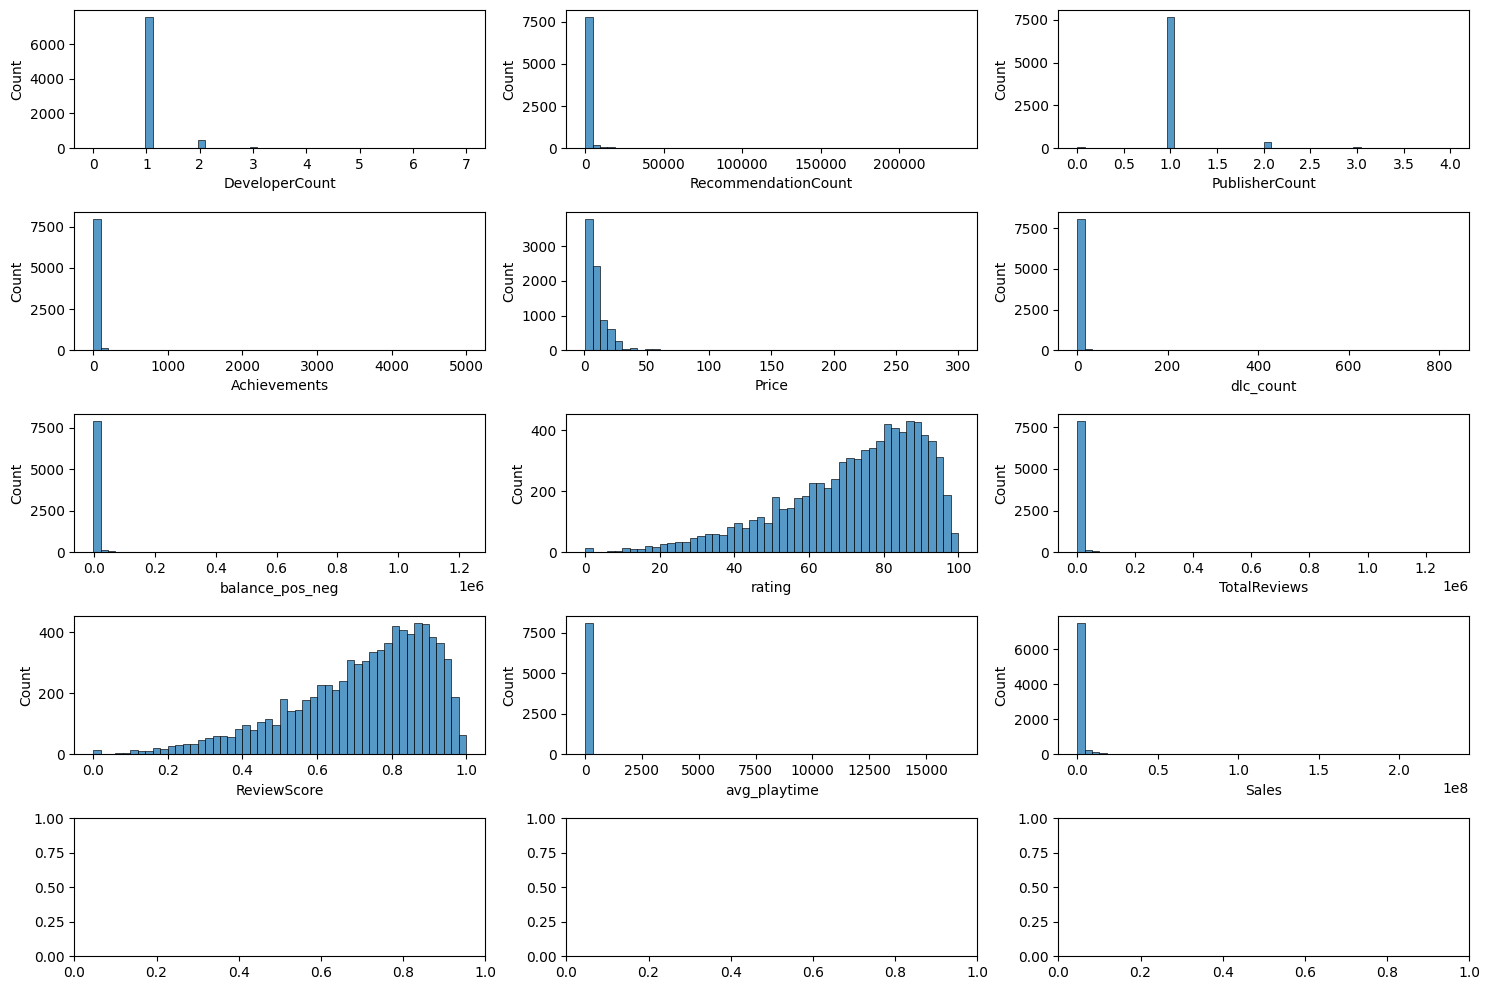

In [429]:
scaling_feat = [
    'DeveloperCount',
    'RecommendationCount',
    'PublisherCount',
    'Achievements',
    # 'SteamSpyPlayersEstimate',
    'Price',
    'dlc_count',
    'balance_pos_neg',
    'rating',
    'TotalReviews',
    'ReviewScore',
    'avg_playtime',
    'Sales']

fig, axs = plt.subplots(5, 3, figsize=(15, 10))

axes = axs.flatten()

for ax, f in zip(axes, scaling_feat):
    sns.histplot(data=df_games, x=f, ax=ax, bins=50)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
# df_games[scaling_feat]

In [430]:
df_games[scaling_feat].describe()

,DeveloperCount,RecommendationCount,PublisherCount,Achievements,Price,dlc_count,balance_pos_neg,rating,TotalReviews,ReviewScore,avg_playtime,Sales
count,8158.000000,8158.000000,8158.000000,8158.000000,8158.000000,8158.000000,8.158000e+03,8158.000000,8.158000e+03,8158.000000,8158.000000,8.158000e+03
mean,1.079063,1101.865899,1.051361,19.544864,9.378571,1.017161,4.284977e+03,72.057596,5.420466e+03,0.720576,11.843050,2.116285e+06
std,0.340550,6842.065353,0.275135,72.413703,9.069192,11.253995,3.526633e+04,18.616925,4.130911e+04,0.186169,189.711542,1.026551e+07
min,0.000000,0.000000,0.000000,0.000000,0.490000,0.000000,-2.884000e+03,0.000000,1.000000e+00,0.000000,0.000000,2.611700e+02
25%,1.000000,0.000000,1.000000,0.000000,3.990000,0.000000,1.400000e+01,61.179972,7.100000e+01,0.611800,1.518654,2.149848e+04
50%,1.000000,0.000000,1.000000,9.000000,6.990000,0.000000,8.900000e+01,76.180638,2.430000e+02,0.761806,3.237094,1.003396e+05
75%,1.000000,324.000000,1.000000,26.000000,9.990000,1.000000,5.407500e+02,86.577850,9.745000e+02,0.865779,6.069103,5.205434e+05
max,7.000000,237684.000000,4.000000,5000.000000,299.900000,825.000000,1.223802e+06,100.000000,1.284736e+06,1.000000,16416.425000,2.315900e+08


In [431]:
rob_feat = ['DeveloperCount',
    'RecommendationCount',
    'PublisherCount',
    # 'SteamSpyPlayersEstimate',
    'Achievements',
    'Price',
    'dlc_count',
    'balance_pos_neg',
    'TotalReviews',
    'Sales',
    'avg_playtime']

std_feat = ['rating', 'ReviewScore']

rob = RobustScaler()

std = StandardScaler()

df_games[rob_feat] = rob.fit_transform(df_games[rob_feat])
df_games[std_feat] = std.fit_transform(df_games[std_feat])

 14  Sales                       10849 non-null  float64
 15  avg_playtime  

In [432]:
df_games.to_csv("GamesFinish.csv", index=False)